# Bank Institution Term Deposit Predictive Model
#### Business Need Case Study
The investment and portfolio department would want to be able to identify their customers who potentially would subscribe to their term deposits. As there has been heightened interest of marketing managers to carefully tune their directed campaigns to the rigorous selection of contacts, the goal of your employer is to find a model that can predict which future clients who would subscribe to their term deposit. Having such an effective predictive model can help increase their campaign efficiency as they would be able to identify customers who would subscribe to their term deposit and thereby direct their marketing efforts to them. This would help them better manage their resources (e.g human effort, phone calls, time)
The Bank of Portugal, therefore, collected a huge amount of data that includes customers profiles of those who have to subscribe to term deposits and the ones who did not subscribe to a term deposit. As their newly employed machine learning researcher, they want you to come up with a robust predictive model that would help them identify customers who would or would not subscribe to their term deposit in the future.
Your main goal as a machine learning researcher is to carry out data exploration, data cleaning, feature extraction, and developing robust machine learning algorithms that would aid them in the department.


## Classification Model for Predicting Term Deposit


#### lets break down this section and do devide and conquere
* Preprocessing 
* Train, Test Split 
* Select Machine Learning Models 


#### preprocessing

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Dataset 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) was subscribed or not. Data set has 21 predictor varaibles (features) and around 41K rows. 

Top 5 rows of the dataset is shown below.

In [9]:
# loading Dataset given for this case study
data_bank = pd.read_csv( "data/bank-additional-full.csv", sep=";")

data_bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Customers who received phone calls may not be unique and a same customer might have received multiple calls. The last column in the dataset 'y' is our response. This report tries to get the best model to predict the subscription of term deposit.

### Explotrary Data analysis

#### Exploratory data analysis

In [10]:
## Graphical analysis
data1 = bank_data[bank_data['y'] == 'yes']
data2 = bank_data[bank_data['y'] == 'no']

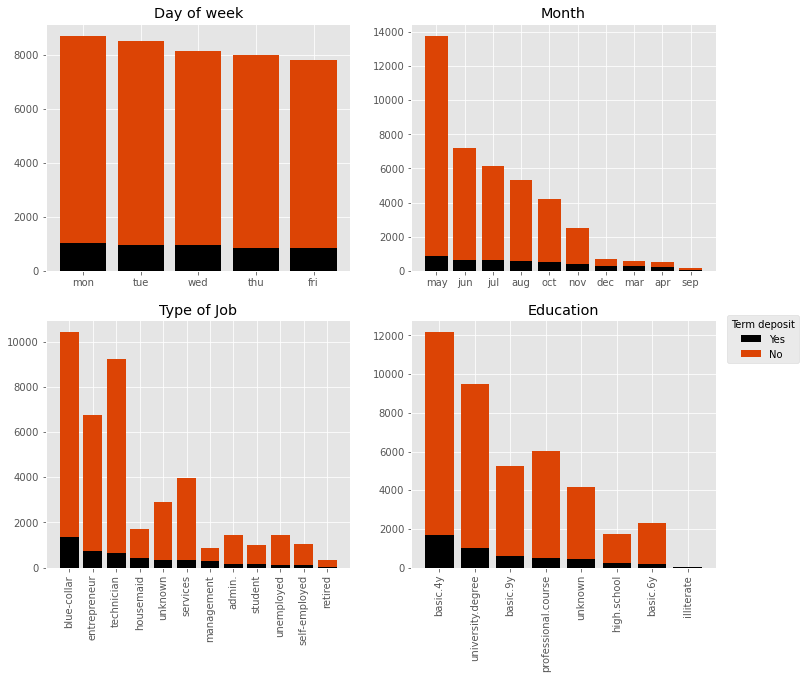

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day_of_week'].unique(),height = data1['day_of_week'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day_of_week'].unique(),height = data2['day_of_week'].value_counts(),bottom = data1['day_of_week'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

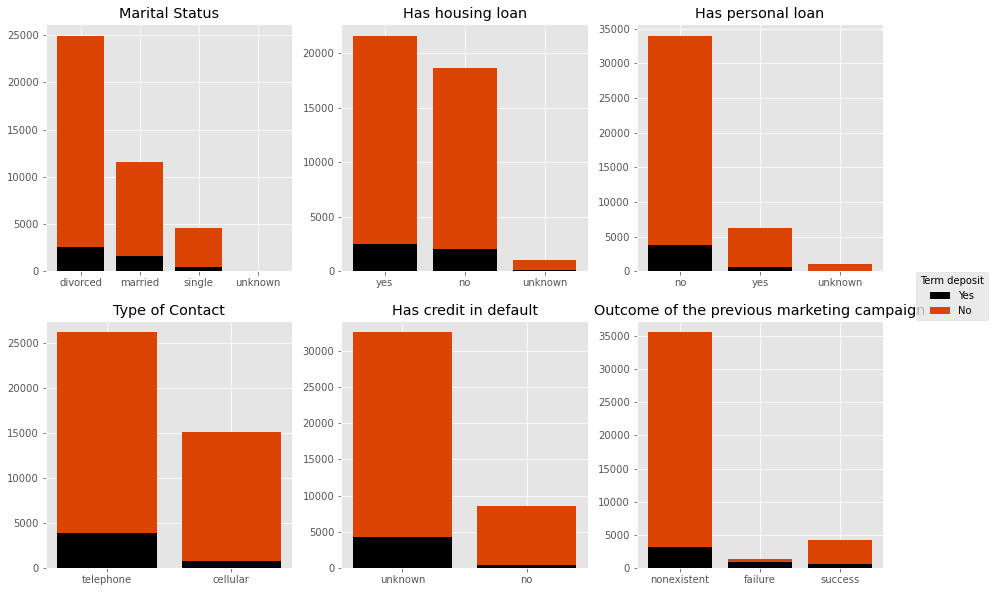

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

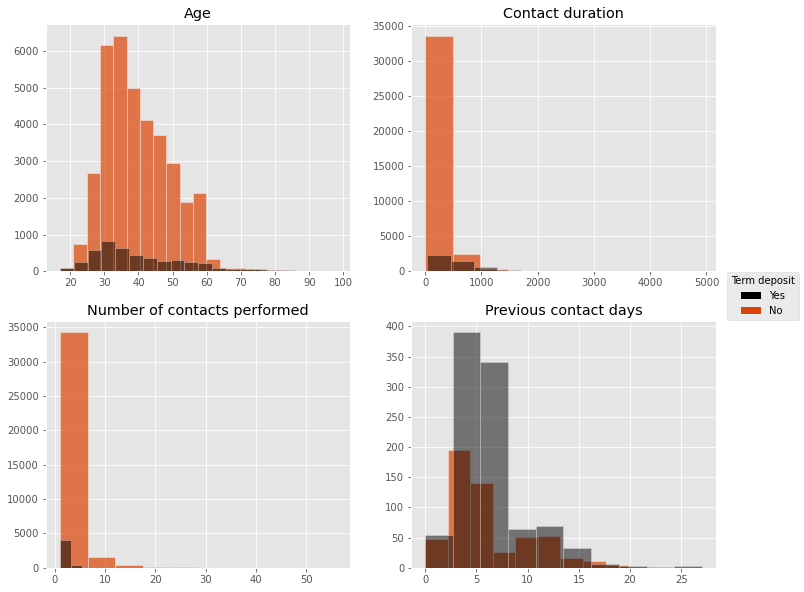

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(data1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(data2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

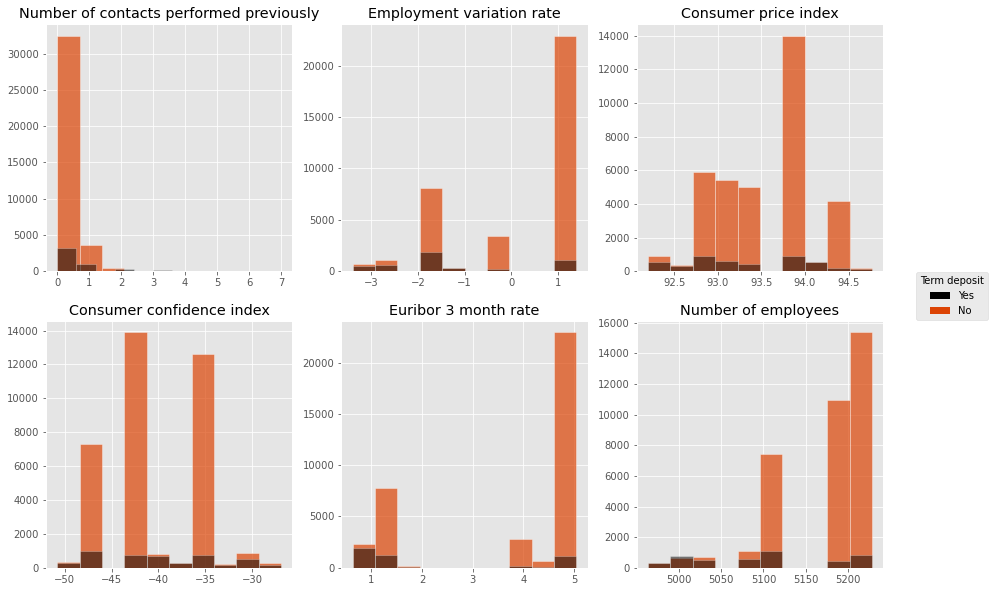

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax[0, 0].hist(data2['previous'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 0].hist(data1['previous'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 0].title.set_text('Number of contacts performed previously')
ax[0, 1].hist(data2['emp.var.rate'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['emp.var.rate'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Employment variation rate')
ax[0, 2].hist(data2['cons.price.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 2].hist(data1['cons.price.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 2].title.set_text('Consumer price index')
ax[1, 0].hist(data2['cons.conf.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['cons.conf.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Consumer confidence index')
ax[1, 1].hist(data2['euribor3m'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1['euribor3m'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Euribor 3 month rate')
ax[1, 2].hist(data2['nr.employed'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 2].hist(data1['nr.employed'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 2].title.set_text('Number of employees')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

All the histograms show similar behavior (proportion of 'no' is higher than 'yes') except 'Previous contact days'. Proportion of 'yes' is higher compared to 'no' (only if contacted more than once).